In [1]:
# import the forces.py file to get the functions we need
import forces

# import numpy to use 
import numpy as np

In [2]:
# create a 1kg mass and earth equivalent mass
test_masses = np.array([1,5.972e24])

# 1 kg mass is on earths surface, so its 6378km from center of earth
position1 = [6378e3,0,0]

# earth position
position2 = [0,0,0]

# combine positions
test_positions = np.array([position1,position2])

# print results
print(f"Force Vector on 1kg mass on Earth's Surface in Newtons: {forces.calculateForceVectors(test_masses,test_positions)[0]}")

Force Vector on 1kg mass on Earth's Surface in Newtons: [-9.79211721  0.          0.        ]


For a 1kg mass on earth's surface, we expect it to experience a 9.8N force downward. This is what we see, indicating that it works correctly.

In [4]:
# import the updateParticles function from leapfrog.py
from leapfrog import updateParticles

In [5]:
# docstring for updateParticles function
updateParticles?

Signature: updateParticles(masses, positions, velocities, delta_time)
Docstring:
Evolve particles in time via leap-frog integrator scheme.

This function takes masses, positions, velocities, and a
time step (delta_time), calculates the next position and
velocity, and then returns the updated (next) particle
positions and velocities.

Parameters
----------
masses : np.ndarray
    1D array containing masses for all particles in kg.
    Its length is the number of particles (AKA "N").

positions : np.ndarray
    2D array containing (x, y, z) positions for each particle.
    Shape is (N, 3) where N is the number of particles.

velocities : np.ndarray
    2D array containing (x, y, z) velocities for each particle.
    Shape is (N, 3) where N is the number of particles.

delta_time : float
    Evolve system for time delta_time in seconds.

Returns
-------
updated positions and velocities : (2D positions np.array, 2D velocities np.array)
    Each being a 2D array with shape (N, 3), where N is

In [6]:
# both mass and earth have 0 initial velocity
velocity1 = [0,0,0]
velocity2 = [0,0,0]

# combien velocities, make the timestep 1 second
test_velocities = np.array([velocity1,velocity2])
timeStep = 1

# pull out updated positions and velocities
new_pos,new_vel = updateParticles(test_masses, test_positions, test_velocities, timeStep)

In [7]:
new_pos

array([[6.37799510e+06, 0.00000000e+00, 0.00000000e+00],
       [8.19835667e-25, 0.00000000e+00, 0.00000000e+00]])

We can see how the 1 kg mass x position decreased (the top left index), while the earth position did not move. This is what we expect to see, since the mass should fall down to earth.



In [9]:
new_vel

array([[-9.79212472e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.63967259e-24,  0.00000000e+00,  0.00000000e+00]])

The 1kg mass x velocity is -9.8 m/s. This makes sense, since the acceleration should be 9.8m/s^2


In [11]:
# function to calculate the trajectory of masses over a multiple time steps
def calculateTrajectories(masses,positions,velocities,time,delta_t):
    '''
    Calculated and Updates the positions and velocities of multiple masses in 3D space
    
    Parameters
    --------
    masses : numpy array containing the mass of each object, in kg
    positions : numpy array containing the 3d positions of each particle (x,y,z), in meters
    velocities : numpy array containing the 3d velocities of each particle (x,y,z), in meters per second
    time : float or int value equal to the total time interval to run the simulation, in seconds
    delta_t : float or int value euqal to the time interval to run each force calculation, in seconds
    
    Returns
    -------
    timeVec : numpy array containing each discrete timestep
    positionArray : 3D array containing the 3D positions of each object, in meters. Size(# of times, # number of particles, # number of dimensions
    velocityArray : 3D array containing the 3D velocities of each object, in meters/second. Size(# of times, # number of particles, # number of dimensions
    
    Example
    --------
    timeVec, positionArray, velocityArray = calculateTrajectories(masses, positions, velocities, time, timeStep)
    '''
    num_particles = len(masses)
    num_dimensions = len(positions[0,0])
    times = np.arange(0,time,delta_t)
    
    positionArray = np.zeros((len(times)+1,num_particles,num_dimensions))
    velocityArray = np.zeros((len(times)+1,num_particles,num_dimensions))
    
    for n in range(num_particles):
        positionArray[0,n] += positions[0,n]
        velocityArray[0,n] += velocities[0,n]
    
    for i in range(len(times)):
    
        updatedPos, updatedVel = updateParticles(masses, positionArray[i], velocityArray[i], delta_t)
        
        for n in range(num_particles):
            positionArray[i+1,n] += updatedPos[n]
            velocityArray[i+1,n] += updatedVel[n]
    
    timeVec = np.arange(0,time+delta_t,delta_t)
    
    return timeVec, positionArray, velocityArray

In [12]:
# conversion from AU to meters
AU = 1.496e11

# masses of sun and earth
sunMass = 1.989e30
earthMass  = 5.972e24

# create masses array
masses = np.array([sunMass,earthMass])

# positions of earth and sun
sunPos = [-3e-6 * AU, 0, 0]
earthPos = [0.999997 * AU, 0 ,0] # AU to meters

# create positions array
positions = np.array([[sunPos, earthPos]])

# velocities
sunVel = [0,-8.94e-2,0]
earthVel = [0,2.98e4,0]

# create array
velocities = np.array([[sunVel,earthVel]])

# do simulation over 1000 days, but convert to seconds
time = 1000 * 24 * 3600

# timestep of 0.1 days, conver to seconds again
timeStep = 0.1 * 24 * 3600

# pass all values in to the function
times1, positions1, velocities1 = calculateTrajectories(masses, positions, velocities, time, timeStep)

In [13]:
# plotting stuff we need
%matplotlib inline
import matplotlib.pyplot as plt

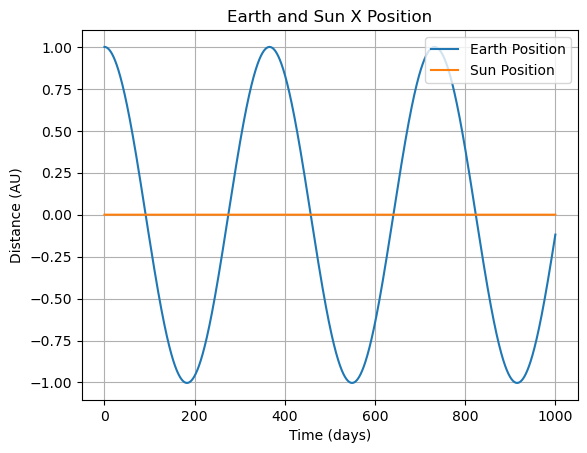

In [14]:
# convert time back into days
times1 = times1 / (24 * 3600)

# pull out earth/sun position values and convert back to AU
earth_x = positions1[:,1,0] / AU
earth_y = positions1[:,1,1] / AU
sun_x = positions1[:,0,0] / AU
sun_y = positions1[:,0,1] / AU

# plot
plt.plot(times1, earth_x)
plt.plot(times1, sun_x)
plt.title("Earth and Sun X Position")
plt.xlabel("Time (days)")
plt.ylabel("Distance (AU)")
plt.legend(["Earth Position" , "Sun Position"],loc  = 'upper right')
plt.grid();

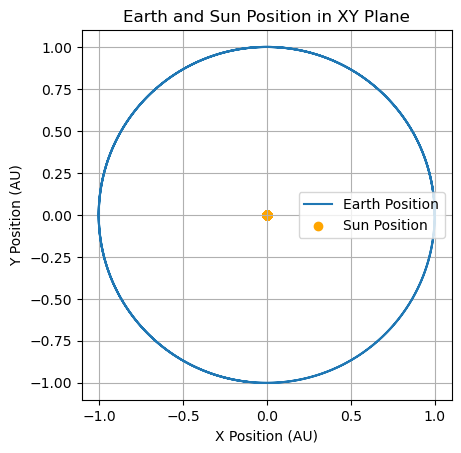

In [15]:
# plot in xy plane
plt.plot(earth_x,earth_y)
plt.scatter(sun_x,sun_y, c = 'orange')
plt.ylim([-1.1,1.1])
plt.axis('scaled')
plt.legend(["Earth Position","Sun Position"])
plt.title("Earth and Sun Position in XY Plane")   
plt.xlabel("X Position (AU)")
plt.ylabel("Y Position (AU)")
plt.grid();

In [16]:
# pull out the sun x velocity
sun_x_velocity = velocities1[:,0,0]

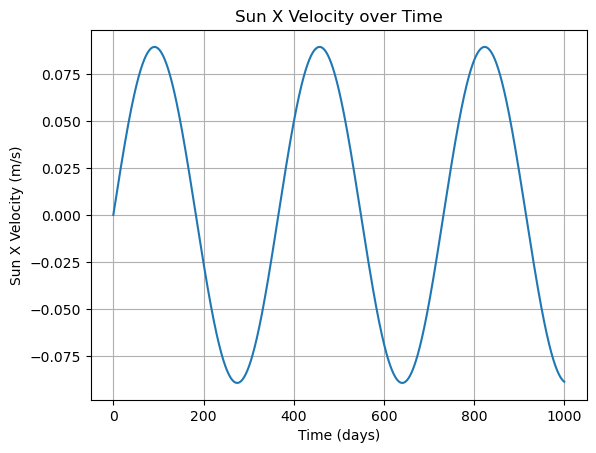

In [17]:
# plot velocity
plt.plot(times1, sun_x_velocity)
plt.grid()
plt.xlabel("Time (days)")
plt.ylabel("Sun X Velocity (m/s)")
plt.title("Sun X Velocity over Time");

In [18]:
# devide all starting velocities by 2
velocities /= 2

In [19]:
# pass updated velocity into the function
times2, positions2, velocities2 = calculateTrajectories(masses, positions, velocities, time, timeStep)

In [20]:
# convert time back into days
times2 = times2 / (24 * 3600)

# pull out earth/sun position values and convert back to AU
earth_x2 = positions2[:,1,0] / AU
earth_y2 = positions2[:,1,1] / AU
sun_x2 = positions2[:,0,0] / AU
sun_y2 = positions2[:,0,1] / AU

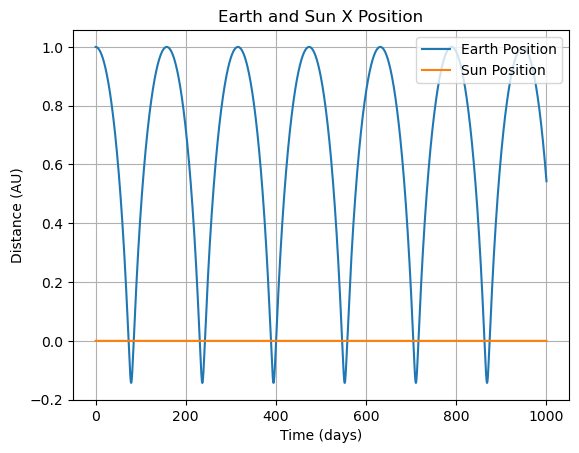

In [21]:
# plot earth x position
plt.plot(times2, earth_x2)
plt.plot(times2, sun_x2)
plt.title("Earth and Sun X Position")
plt.xlabel("Time (days)")
plt.ylabel("Distance (AU)")
plt.legend(["Earth Position" , "Sun Position"],loc  = 'upper right')
plt.grid();

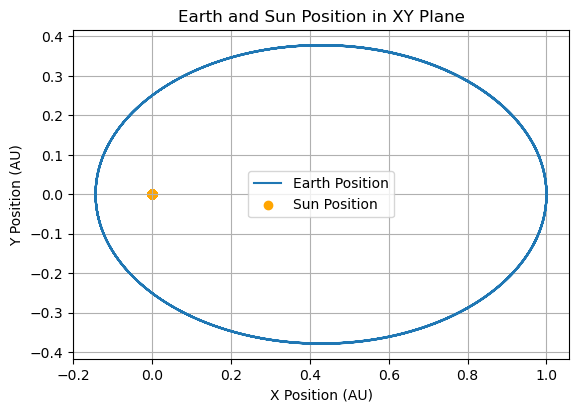

In [22]:
# plot xy plane
plt.plot(earth_x2,earth_y2)
plt.scatter(sun_x2,sun_y2, c = 'orange')
plt.ylim([-1.1,1.1])
plt.axis('scaled')
plt.legend(["Earth Position","Sun Position"])
plt.title("Earth and Sun Position in XY Plane")   
plt.xlabel("X Position (AU)")
plt.ylabel("Y Position (AU)")
plt.grid();

In [23]:
# import pandas to read the file
import pandas as pd

In [24]:
# read file in 
exoplanet_data = pd.read_csv('kepler16.txt', comment = '#',names = ['mass', 'x','y', 'z', 'vx','vy','vz'], sep = ' ' )

In [25]:
exoplanet_data

,mass,x,y,z,vx,vy,vz
0,1.371800e+30,7.634900e+09,-965870.0,1.844700e+09,-1050.2,-6.8224,13030.0
1,4.028700e+29,-2.599800e+10,3288900.0,-6.281300e+09,3576.0,23.2310,-44368.0
2,6.325000e+26,3.776100e+10,-40923000.0,8.193400e+10,-36298.0,-10.8120,17020.0


In [26]:
# pull out the masses, positions, and velocties
exoplanetMasses = exoplanet_data.mass
exoplanetX = exoplanet_data.x
exoplanetY = exoplanet_data.y
exoplanetZ = exoplanet_data.z
exoplanetVX = exoplanet_data.vx
exoplanetVY = exoplanet_data.vy
exoplanetVZ = exoplanet_data.vz

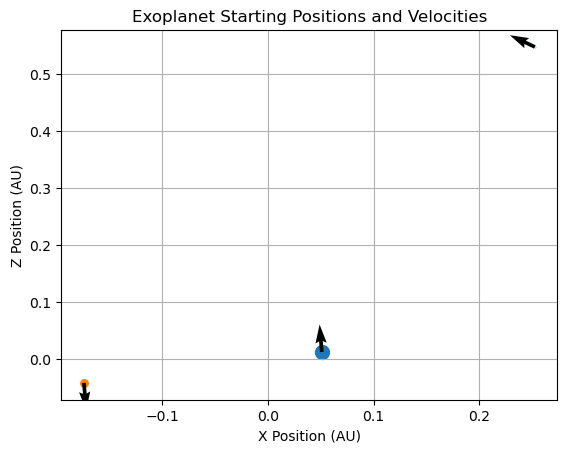

In [27]:
# plot the starting positions and velocities, scaling the size of each planet to its mass
for i in range(len(exoplanetMasses)):
    scaleVal = (exoplanetMasses[i]/max(exoplanetMasses))* 100                             
    plt.scatter(exoplanetX[i]/AU,exoplanetZ[i]/AU, s = scaleVal)
    plt.quiver(exoplanetX[i]/AU, exoplanetZ[i]/AU, exoplanetVX[i], exoplanetVZ[i]);
plt.title("Exoplanet Starting Positions and Velocities")
plt.xlabel("X Position (AU)")
plt.ylabel("Z Position (AU)")
plt.grid()

In [28]:
# put x,y,z positions into single lists
planet0pos = [exoplanetX[0],exoplanetY[0],exoplanetZ[0]]
planet1pos = [exoplanetX[1],exoplanetY[1],exoplanetZ[1]]
planet2pos = [exoplanetX[2],exoplanetY[2],exoplanetZ[2]]

# put into an array
exo_positions = np.array([[planet0pos, planet1pos, planet2pos]])

# repeat for velocities
planet0vel = [exoplanetVX[0],exoplanetVY[0],exoplanetVZ[0]]
planet1vel = [exoplanetVX[1],exoplanetVY[1],exoplanetVZ[1]]
planet2vel = [exoplanetVX[2],exoplanetVY[2],exoplanetVZ[2]]

exo_velocities = np.array([[planet0vel, planet1vel, planet2vel]])

In [29]:
# 500 day simulation, converted into seconds
time = 500 * 24 * 3600

# 0.5 day timestep converted into positions
timeStep = 0.5 * 24 * 3600

# pass into trajectories function
times3, positions3, velocities3 = calculateTrajectories(exoplanetMasses, exo_positions, exo_velocities, time, timeStep)

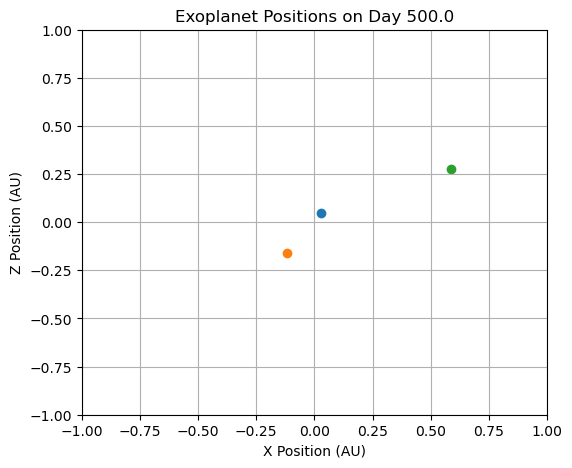

In [30]:
# make animation of exoplanet positions over time
import matplotlib.animation as ani
#import os
writer = ani.FFMpegWriter(fps=10)
fig = plt.figure(figsize=(6,5))
#output_path = os.path.join(os.getcwd(), 'exoplanets.mp4')

with writer.saving(fig, 'exoplanets.mp4', 100):
    for i in range(len(times3)):
        plt.cla()
        
        # plot the positions of each planet over each timestep
        for n in range(len(exoplanetMasses)):
            plt.scatter(positions3[i,n,0]/AU,positions3[i,n,2]/AU)
            plt.xlim(-1,1)
            plt.ylim(-1,1)
            plt.grid()
            plt.title(f"Exoplanet Positions on Day {times3[i]/(24*3600)}")
            plt.xlabel("X Position (AU)")
            plt.ylabel("Z Position (AU)")

        writer.grab_frame() 

In [59]:
# show the video
from IPython.display import Video
Video("exoplanets.mp4", embed=True)